Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv



In [3]:
df=pd.read_csv("./full_2020.csv")
#df.describe()
mask= (df['nom_commune']=='Ceyzériat') & (df['type_local']=='Appartement')
df[mask]

#df

D:\IDES\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude


In [5]:
#df.dropna(subset = ["code_postal"], inplace=True)
#df['code_postal']=df['code_postal'].astype(int,errors='ignore')
#print(df['code_postal'])

df.isnull().sum()

id_mutation                           0
date_mutation                         0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   31752
adresse_numero                   990345
adresse_suffixe                 2352374
adresse_nom_voie                  31123
adresse_code_voie                 30948
code_postal                       30992
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2459559
ancien_nom_commune              2459559
id_parcelle                           0
ancien_id_parcelle              2459559
numero_volume                   2452794
lot1_numero                     1702571
lot1_surface_carrez             2250280
lot2_numero                     2303817
lot2_surface_carrez             2408519
lot3_numero                     2434251
lot3_surface_carrez             2454703
lot4_numero                     2450649


In [3]:
df['date_mutation']=pd.to_datetime(df['date_mutation'])
df=df.drop(['adresse_suffixe','ancien_code_commune','ancien_nom_commune','ancien_id_parcelle','numero_volume','lot1_numero','lot1_surface_carrez'
,'lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','lot4_numero','lot4_surface_carrez','lot5_numero','lot5_surface_carrez',
'code_type_local','code_nature_culture','code_nature_culture_speciale'],axis=1)
df['adresse_code_voie']=str(df['adresse_code_voie'])
df['code_commune']=df['code_commune'].astype(str)
df['nom_commune']=df['nom_commune'].astype(str)
df['code_departement']=df['code_departement'].astype(str)
df['id_parcelle']=df['id_parcelle'].astype(str)
df['nature_culture']=df['nature_culture'].astype(str)
df['nature_culture_speciale']=df['nature_culture_speciale'].astype(str)
index = df.index
number_of_rows = len(index)
print(number_of_rows)

#my_report= sv.analyze(df)


2459560


In [11]:
#my_report.show_html()
#my_report.show_notebook()
df['nature_culture']


0                   terres
1          taillis simples
2                   terres
3                   terres
4                   terres
                ...       
2459555               sols
2459556               sols
2459557               sols
2459558               sols
2459559                nan
Name: nature_culture, Length: 2459560, dtype: object

Vente                                 2245097
Vente en l'état futur d'achèvement     181174
Echange                                 23125
Vente terrain à bâtir                    6814
Adjudication                             2744
Expropriation                             606
Name: nature_mutation, dtype: int64
<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0, 0.5, 'Percentage')

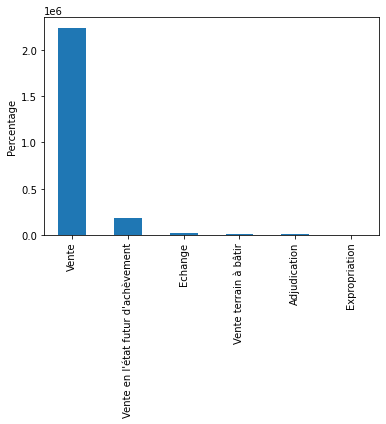

In [14]:

df_sorted=(df['nature_mutation'].value_counts()).plot(kind='bar')
print(df['nature_mutation'].value_counts())
print(type(df_sorted))
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

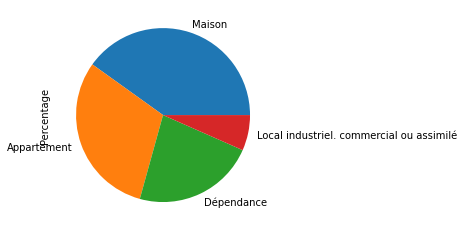

In [9]:
df_sorted=(df['type_local'].value_counts(normalize=True).mul(100).round(1)).plot(kind='pie')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

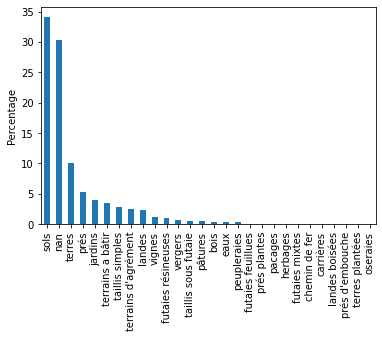

In [10]:
df_sorted=(df['nature_culture'].value_counts(normalize=True).mul(100).round(1)).plot(kind='bar')
plt.ylabel('Percentage')